# Import iris dataset using seaborn

In [3]:
import seaborn as sns

# Load the dataset
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Summary Statsics

In [47]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Checking null values

In [17]:
iris.isnull().sum()
#if we choose null value than we want perform data cleaning and processing which is done in task 1

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Boxplot and histogram

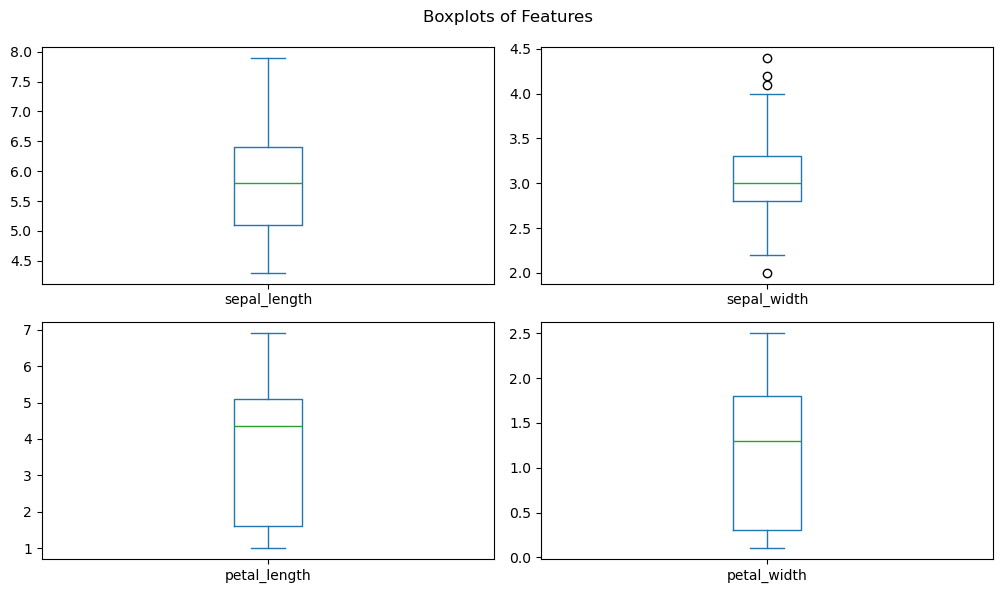

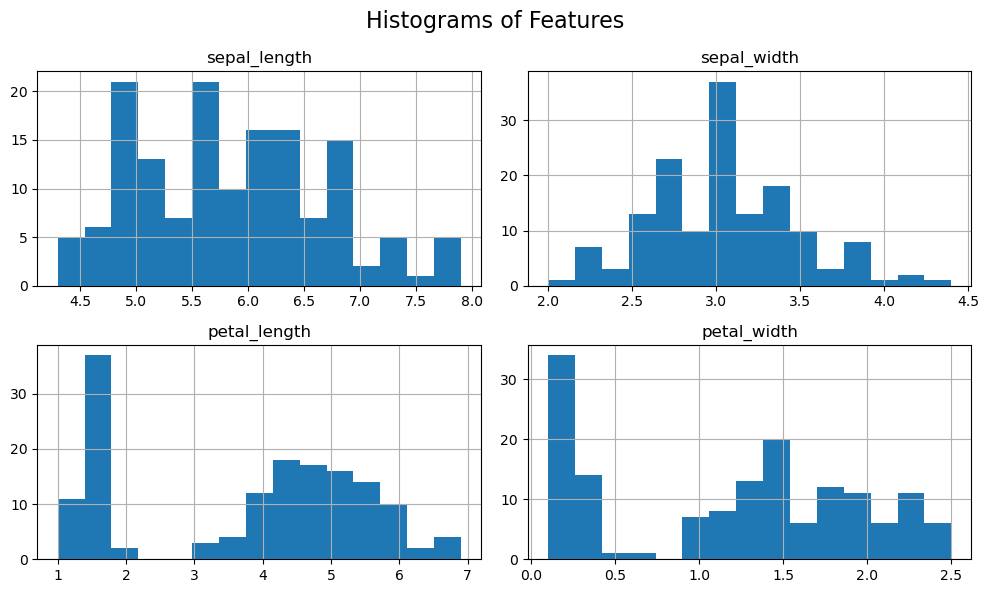

In [22]:
import matplotlib.pyplot as plt
# Boxplots
iris.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,6), title='Boxplots of Features')
plt.tight_layout()
plt.show()

# Histograms
iris.hist(figsize=(10,6), bins=15)
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()


## Correlation Heatmap

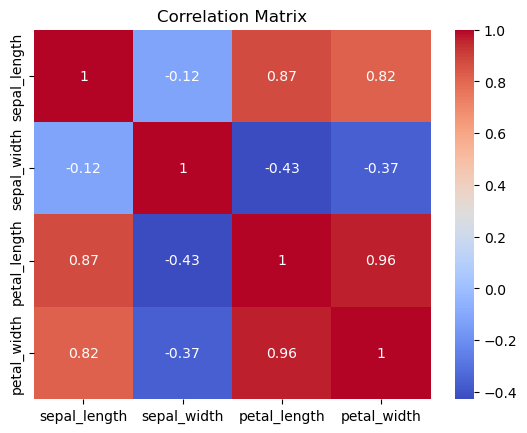

In [98]:
# Import required libraries
import matplotlib.pyplot as plt

# Compute correlation only on numeric features
numeric_data = iris.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Pairplot 

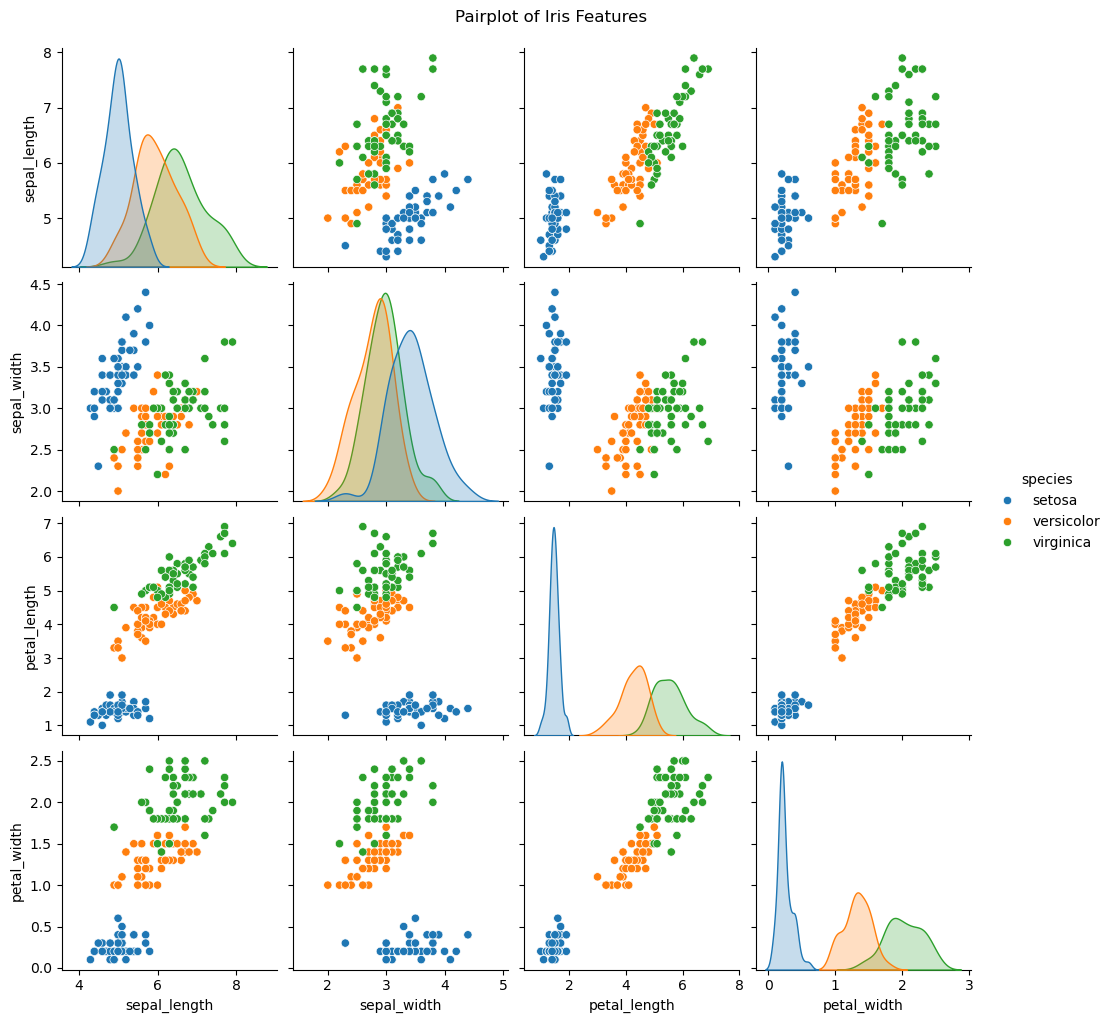

In [36]:
sns.pairplot(iris, hue='species')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

## Class wise Summary Stastics

In [54]:

iris.groupby('species').agg(['mean', 'median', 'std'])


sepal_length                  sepal_width                   \
                   mean median       std        mean median       std   
species                                                                 
setosa            5.006    5.0  0.352490       3.428    3.4  0.379064   
versicolor        5.936    5.9  0.516171       2.770    2.8  0.313798   
virginica         6.588    6.5  0.635880       2.974    3.0  0.322497   

           petal_length                  petal_width                   
                   mean median       std        mean median       std  
species                                                                
setosa            1.462   1.50  0.173664       0.246    0.2  0.105386  
versicolor        4.260   4.35  0.469911       1.326    1.3  0.197753  
virginica         5.552   5.55  0.551895       2.026    2.0  0.274650

## Violin Plots

<Axes: xlabel='species', ylabel='petal_length'>

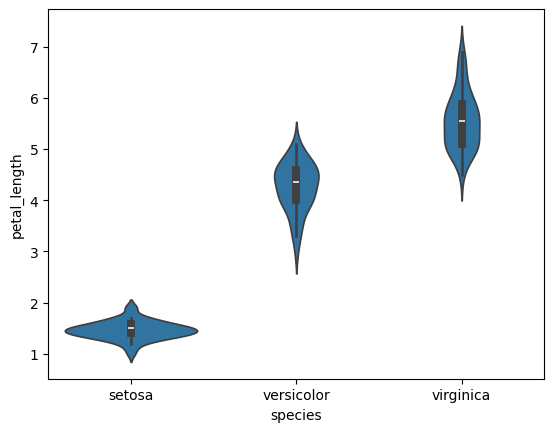

In [59]:
sns.violinplot(x='species', y='petal_length', data=iris)


## Swarm/Strip Plots

<Axes: xlabel='species', ylabel='sepal_width'>

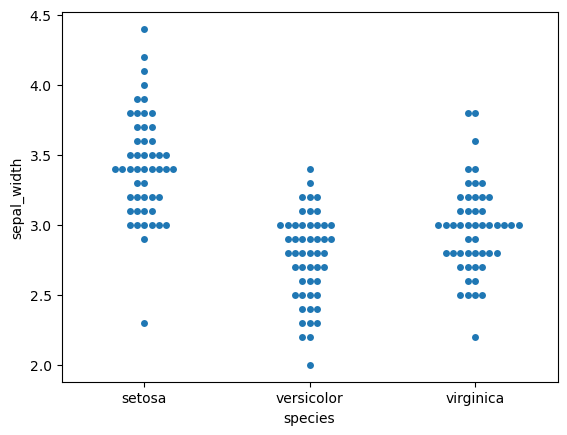

In [66]:
sns.swarmplot(x='species', y='sepal_width', data=iris)

## Density Plots (KDE)

<Axes: xlabel='petal_length', ylabel='Density'>

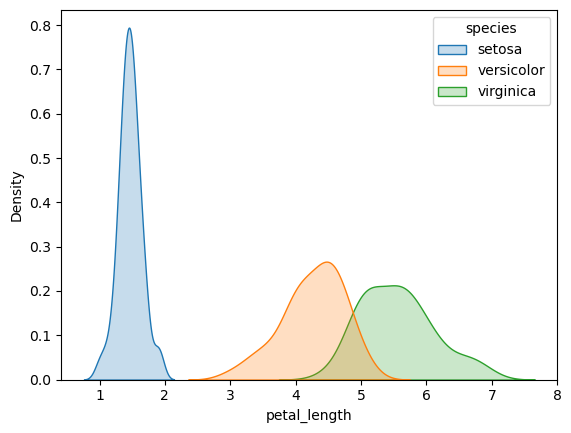

In [75]:
sns.kdeplot(data=iris, x='petal_length', hue='species', fill=True)

##  Boxen Plots

<Axes: xlabel='species', ylabel='sepal_length'>

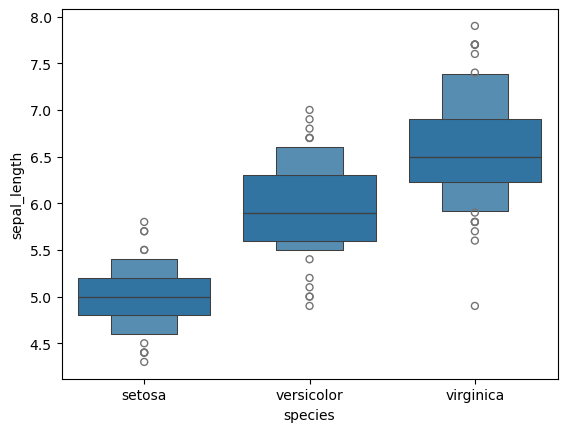

In [80]:
sns.boxenplot(x='species', y='sepal_length', data=iris)

## Multivariate Analysis

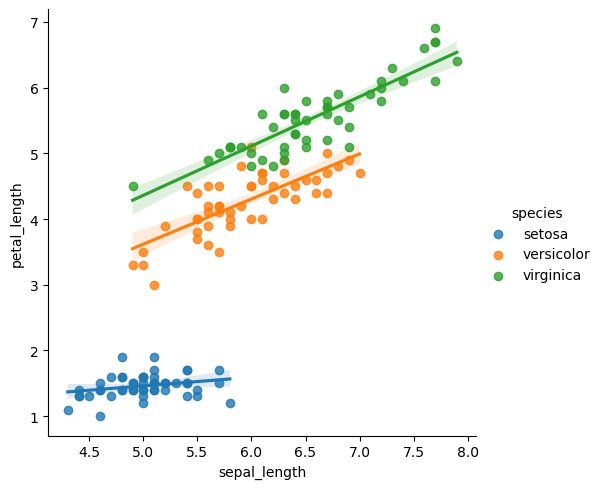

In [85]:
sns.lmplot(x='sepal_length', y='petal_length', hue='species', data=iris)

## Outlier Detection

In [88]:
Q1 = iris['sepal_width'].quantile(0.25)
Q3 = iris['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
outliers = iris[(iris['sepal_width'] < Q1 - 1.5 * IQR) | (iris['sepal_width'] > Q3 + 1.5 * IQR)]
print(outliers)


    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


## Pairwise Correlation by Class

Correlation Heatmap for setosa


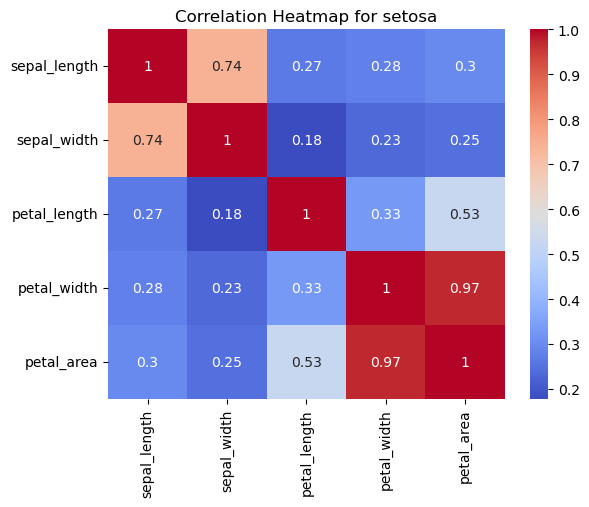

Correlation Heatmap for versicolor


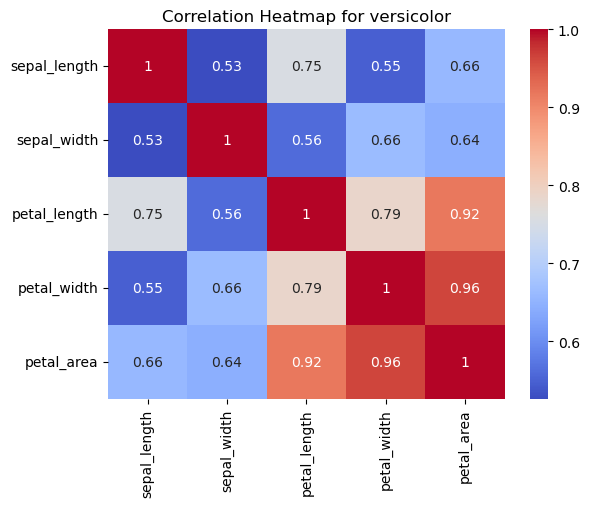

Correlation Heatmap for virginica


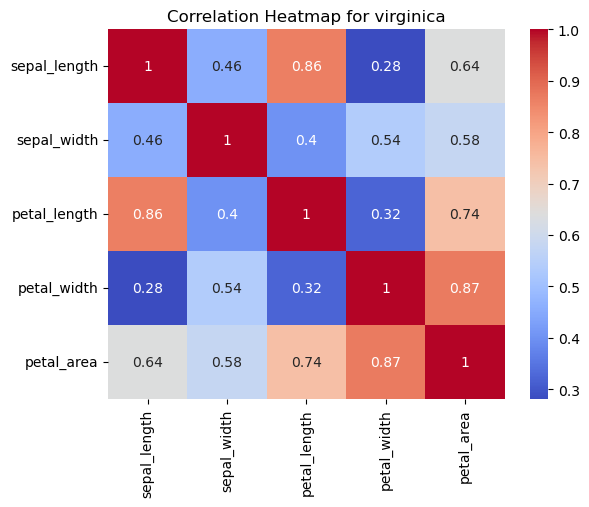

In [117]:
for sp in iris['species'].unique():
    print(f"Correlation Heatmap for {sp}")
    subset = iris[iris['species'] == sp].select_dtypes(include='number')
    corr = subset.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Heatmap for {sp}")
    plt.show()


In [104]:
## Interactive Plots with Plotly

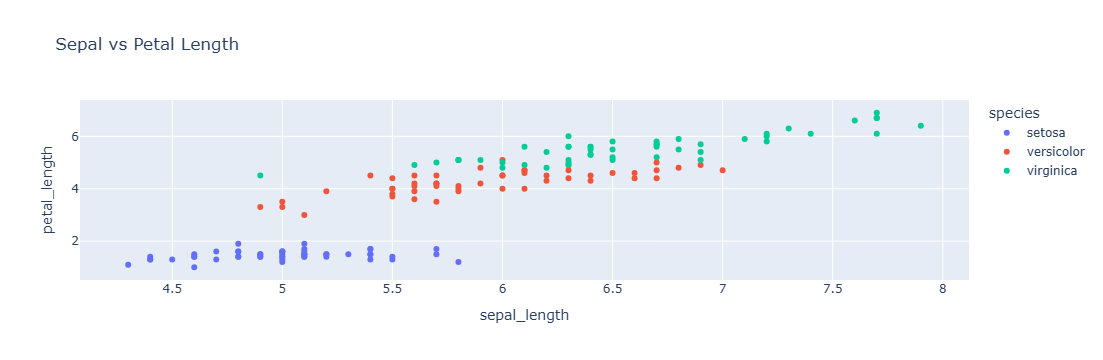

In [106]:
import plotly.express as px
px.scatter(iris, x="sepal_length", y="petal_length", color="species", title="Sepal vs Petal Length")


In [108]:
## Feature Engineering Ideas

<Axes: xlabel='species', ylabel='petal_area'>

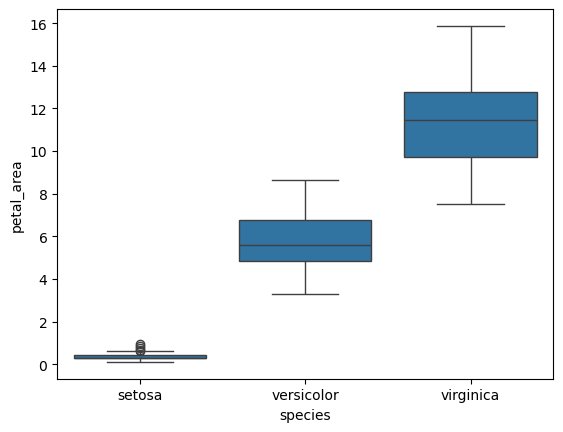

In [114]:
iris['petal_area'] = iris['petal_length'] * iris['petal_width']
sns.boxplot(x='species', y='petal_area', data=iris)


## Inferences

1. **Summary Statistics** confirmed all values are within expected ranges, with no missing data.
2. **Histograms and Boxplots** showed distinct separations for petal-related features across species.
3. **Pairplot** revealed that:
   - `Setosa` is linearly separable from the other two species.
   - `Versicolor` and `Virginica` have some overlap.
4. **Correlation Heatmap (overall)**:
   - Strong positive correlation between `petal_length` and `petal_width`.
   - Weak or no correlation between `sepal_width` and other features.
5. **Species-wise Correlation Heatmaps**:
   - **Setosa**: Very low correlation among all features.
   - **Versicolor**: Moderate to strong correlation between `petal_length` and `petal_width`.
   - **Virginica**: Very strong correlation between `petal_length` and `petal_width` (near 0.79).
6. **No outliers or nulls** were found, confirming data cleanliness.
7. **Feature Engineering** with `petal_area` suggests it can enhance classification performance.
